In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hdcsv/hd.csv
/kaggle/input/india-headlines-news-dataset/india-news-headlines.csv


In [2]:
import pandas as pd 
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [4]:
import warnings  
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Loading stocks dataset and INDIA-NEWS-HEADLINES Dataset

In [5]:
stocks = pd.read_csv('../input/hdcsv/hd.csv')
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,40.9375,41.12500,35.15625,35.43750,24.332151,36380600
1,2001-01-03,34.5625,42.87500,34.53125,42.03125,28.859581,47526000
2,2001-01-04,39.5000,41.18750,38.37500,39.46875,27.100096,40355600
3,2001-01-05,39.6875,39.90625,36.28125,36.53125,25.083151,31656400
4,2001-01-08,36.5000,39.00000,35.87500,38.93750,26.735340,23359400


In [6]:
inh = pd.read_csv('../input/india-headlines-news-dataset/india-news-headlines.csv')
inh.head(-5)


,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424057,20201231,india,50 NRIs reach Singhu; offer help to farmers
3424058,20201231,city.amritsar,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,20201231,city.bengaluru,Azim Premji organisation's name misused to che...
3424060,20201231,india,Get govt nod to probe officials: MP to agencies


In [7]:
del inh["headline_category"]
inh.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [8]:
inh.rename({'publish_date': 'Date'}, axis=1, inplace=True)
inh

,Date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic
...,...,...
3424062,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,Govt extends deadline for use of FASTag till F...


# Text Preprocessing

In [9]:


inh['Date']=pd.to_datetime(inh['Date'],format='%Y%m%d')

stocks['Date']=pd.to_datetime(stocks['Date'])

stocks.head()

inh.tail()

inh=inh.rename(columns={"publish_date": "Date" })

# Plotting the line chart for change in Adj Close in stocks from 2001 to 2020

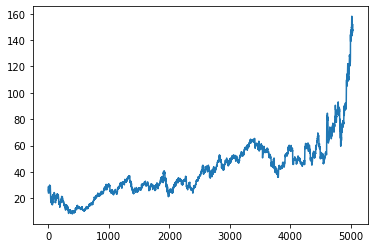

In [10]:
plt.plot(stocks['Adj Close'])

In [11]:
inh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   headline_text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 52.2+ MB


In [12]:
inh.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


# Group by the headline_text of dataset INDIA-NEWS -HEADLINES by Date

In [13]:
inh['headline_text']=inh.groupby(['Date']).transform(lambda x:' '.join(x))
inh=inh.drop_duplicates(subset=None,keep='first',inplace=False)
inh.reset_index(inplace=True,drop=True)
inh


,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [14]:
inh.iloc[0:3,:]

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...


# Textual Analysis of inh data

In [15]:


import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [16]:
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

# Text Preprocessing

In [17]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = inh['headline_text'].apply(tokenizer.tokenize)
words_descriptions.head()

0    [Status, quo, will, not, be, disturbed, at, Ay...
1    [Powerless, north, India, gropes, in, the, dar...
2    [The, string, that, pulled, Stephen, Hawking, ...
3    [Light, combat, craft, takes, India, into, clu...
4    [Light, combat, craft, takes, India, into, clu...
Name: headline_text, dtype: object

In [18]:
inh['words_descriptions']=words_descriptions


inh.head()

,Date,headline_text,words_descriptions
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,"[Status, quo, will, not, be, disturbed, at, Ay..."
1,2001-01-03,Powerless north India gropes in the dark Think...,"[Powerless, north, India, gropes, in, the, dar..."
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,"[The, string, that, pulled, Stephen, Hawking, ..."
3,2001-01-05,Light combat craft takes India into club class...,"[Light, combat, craft, takes, India, into, clu..."
4,2001-01-06,Light combat craft takes India into club class...,"[Light, combat, craft, takes, India, into, clu..."


In [19]:
inh['scores'] = inh['headline_text'].apply(lambda review: analyser.polarity_scores(review))



inh['compound']  = inh['scores'].apply(lambda score_dict: score_dict['compound'])

inh['neg']  = inh['scores'].apply(lambda score_dict: score_dict['neg'])

inh['neu']  = inh['scores'].apply(lambda score_dict: score_dict['neu'])

inh['pos']  = inh['scores'].apply(lambda score_dict: score_dict['pos'])

inh.head()

,Date,headline_text,words_descriptions,scores,compound,neg,neu,pos
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,"[Status, quo, will, not, be, disturbed, at, Ay...","{'neg': 0.122, 'neu': 0.807, 'pos': 0.071, 'co...",-0.9811,0.122,0.807,0.071
1,2001-01-03,Powerless north India gropes in the dark Think...,"[Powerless, north, India, gropes, in, the, dar...","{'neg': 0.122, 'neu': 0.766, 'pos': 0.111, 'co...",-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,"[The, string, that, pulled, Stephen, Hawking, ...","{'neg': 0.1, 'neu': 0.797, 'pos': 0.103, 'comp...",0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,"[Light, combat, craft, takes, India, into, clu...","{'neg': 0.124, 'neu': 0.722, 'pos': 0.154, 'co...",0.9633,0.124,0.722,0.154
4,2001-01-06,Light combat craft takes India into club class...,"[Light, combat, craft, takes, India, into, clu...","{'neg': 0.152, 'neu': 0.704, 'pos': 0.143, 'co...",-0.4215,0.152,0.704,0.143


In [20]:
def sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [21]:
inh['Sentiment'] = inh['compound'].apply(sentimnt)


inh.head()

,Date,headline_text,words_descriptions,scores,compound,neg,neu,pos,Sentiment
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,"[Status, quo, will, not, be, disturbed, at, Ay...","{'neg': 0.122, 'neu': 0.807, 'pos': 0.071, 'co...",-0.9811,0.122,0.807,0.071,Negative
1,2001-01-03,Powerless north India gropes in the dark Think...,"[Powerless, north, India, gropes, in, the, dar...","{'neg': 0.122, 'neu': 0.766, 'pos': 0.111, 'co...",-0.2640,0.122,0.766,0.111,Negative
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,"[The, string, that, pulled, Stephen, Hawking, ...","{'neg': 0.1, 'neu': 0.797, 'pos': 0.103, 'comp...",0.8738,0.100,0.797,0.103,Positive
3,2001-01-05,Light combat craft takes India into club class...,"[Light, combat, craft, takes, India, into, clu...","{'neg': 0.124, 'neu': 0.722, 'pos': 0.154, 'co...",0.9633,0.124,0.722,0.154,Positive
4,2001-01-06,Light combat craft takes India into club class...,"[Light, combat, craft, takes, India, into, clu...","{'neg': 0.152, 'neu': 0.704, 'pos': 0.143, 'co...",-0.4215,0.152,0.704,0.143,Negative


In [22]:
inh.Sentiment.value_counts()

Negative    6879
Positive     375
Neutral        8
Name: Sentiment, dtype: int64

# Plotting count of Category wise Sentiments

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

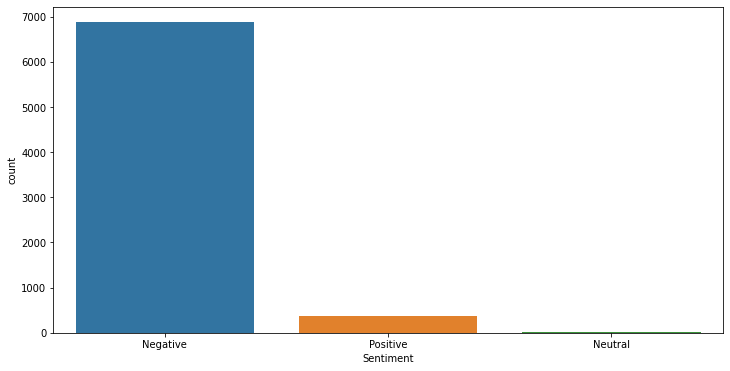

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=inh)

# Finding Polarity and Subjectivity of text through Textblob 

In [24]:
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob, Word, Blobber

In [25]:
inh['TB_score']= inh.headline_text.apply(lambda x: TextBlob(x).sentiment)
inh.head()

inh['TB_sentiment'] = inh['headline_text'].apply(lambda x: TextBlob(x).sentiment[0])
inh.head()

inh['Subjectivity'] = inh['headline_text'].apply(lambda x: TextBlob(x).sentiment[1])
inh.head()

inh.head()

,Date,headline_text,words_descriptions,scores,compound,neg,neu,pos,Sentiment,TB_score,TB_sentiment,Subjectivity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,"[Status, quo, will, not, be, disturbed, at, Ay...","{'neg': 0.122, 'neu': 0.807, 'pos': 0.071, 'co...",-0.9811,0.122,0.807,0.071,Negative,"(0.15133333333333332, 0.2823333333333333)",0.151333,0.282333
1,2001-01-03,Powerless north India gropes in the dark Think...,"[Powerless, north, India, gropes, in, the, dar...","{'neg': 0.122, 'neu': 0.766, 'pos': 0.111, 'co...",-0.2640,0.122,0.766,0.111,Negative,"(0.08846153846153845, 0.40769230769230763)",0.088462,0.407692
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,"[The, string, that, pulled, Stephen, Hawking, ...","{'neg': 0.1, 'neu': 0.797, 'pos': 0.103, 'comp...",0.8738,0.100,0.797,0.103,Positive,"(0.08796128734653325, 0.44684727840465543)",0.087961,0.446847
3,2001-01-05,Light combat craft takes India into club class...,"[Light, combat, craft, takes, India, into, clu...","{'neg': 0.124, 'neu': 0.722, 'pos': 0.154, 'co...",0.9633,0.124,0.722,0.154,Positive,"(0.2620243128964059, 0.47661205073995766)",0.262024,0.476612
4,2001-01-06,Light combat craft takes India into club class...,"[Light, combat, craft, takes, India, into, clu...","{'neg': 0.152, 'neu': 0.704, 'pos': 0.143, 'co...",-0.4215,0.152,0.704,0.143,Negative,"(0.24848484848484853, 0.4393939393939394)",0.248485,0.439394


In [26]:
inh=inh.rename(columns={"TB_sentiment": "Polarity" })

inh=inh.drop(columns=['headline_text','words_descriptions','scores','Sentiment','TB_score'])

inh.head()

,Date,compound,neg,neu,pos,Polarity,Subjectivity
0,2001-01-02,-0.9811,0.122,0.807,0.071,0.151333,0.282333
1,2001-01-03,-0.2640,0.122,0.766,0.111,0.088462,0.407692
2,2001-01-04,0.8738,0.100,0.797,0.103,0.087961,0.446847
3,2001-01-05,0.9633,0.124,0.722,0.154,0.262024,0.476612
4,2001-01-06,-0.4215,0.152,0.704,0.143,0.248485,0.439394


# Merge stocks and inh dataframe by Date

In [27]:
df=pd.merge(stocks,inh,how='left',on='Date')

df.head()

big_data=df.drop(columns=["High","Low","Open","Volume","Date"])

big_data.tail()

,Close,Adj Close,compound,neg,neu,pos,Polarity,Subjectivity
5027,148.789993,148.084259,-0.9985,0.092,0.841,0.068,0.048166,0.390942
5028,147.740005,147.039246,-0.9998,0.137,0.771,0.092,0.070517,0.412945
5029,148.490005,147.785690,-0.9999,0.148,0.758,0.094,0.061210,0.424021
5030,149.949997,149.238754,-0.9999,0.141,0.780,0.079,0.043496,0.441660
5031,152.339996,151.617416,-0.9998,0.136,0.766,0.098,0.091373,0.406220


In [28]:
big_data.isnull().sum()

big_data=big_data.dropna()

# Normalizing the Data

In [29]:
from sklearn.preprocessing import MinMaxScaler
nd=MinMaxScaler()
bigt_data=pd.DataFrame(nd.fit_transform(big_data))
bigt_data.columns=big_data.columns
bigt_data.index=big_data.index
bigt_data.head()

,Close,Adj Close,compound,neg,neu,pos,Polarity,Subjectivity
0,0.160371,0.107934,0.00945,0.274775,0.807,0.116776,0.524545,0.282333
1,0.205249,0.138138,0.36800,0.274775,0.766,0.182566,0.438811,0.407692
2,0.187808,0.126400,0.93690,0.225225,0.797,0.169408,0.438129,0.446847
3,0.167815,0.112944,0.98165,0.279279,0.722,0.253289,0.675488,0.476612
4,0.184193,0.123966,0.01105,0.272523,0.812,0.108553,0.291981,0.414653


# Making Final Model for Adj Close Prediction

In [35]:
features=['compound','neg','neu','pos','Polarity','Subjectivity']
X=bigt_data[features]
y=bigt_data['Adj Close']

X.head()

,compound,neg,neu,pos,Polarity,Subjectivity
0,0.00945,0.274775,0.807,0.116776,0.524545,0.282333
1,0.36800,0.274775,0.766,0.182566,0.438811,0.407692
2,0.93690,0.225225,0.797,0.169408,0.438129,0.446847
3,0.98165,0.279279,0.722,0.253289,0.675488,0.476612
4,0.01105,0.272523,0.812,0.108553,0.291981,0.414653


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split


train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.3, random_state = 0)
# Define model
Tree_model = DecisionTreeRegressor()
# Fit model
Tree_model.fit(train_X, train_y)

#Prediction
val_predictions = Tree_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.09430676467669424


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, preds))

0.06916189318846874


> Since Random Forest Regressor Model works better results we will opt for that.